## reminder: Model Architecture

<img src="etc/ANN-LearningRates-Architecture.png">

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

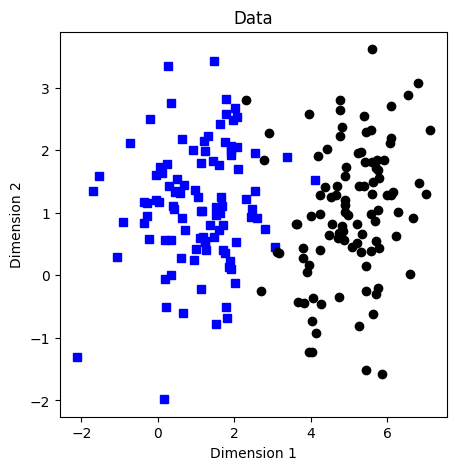

In [191]:
nPerClust = 100
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [192]:
def buildModel(learningRate):
    ANNclassifier = nn.Sequential(
        nn.Linear(2, 1),
        nn.ReLU(),
        nn.Linear(1,1),
    )

    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNclassifier.parameters(), lr=learningRate)

    return ANNclassifier, lossfun, optimizer

In [193]:
Nepochs = 1000
def trainModel(ANNmodel,lossfn,optimizer):
    losses = torch.zeros(Nepochs)

    for i in range(Nepochs):
        # Forward pass
        yHat = ANNmodel(data)

        # Compute loss
        loss = lossfn(yHat, labels)
        losses[i] = loss
        
        # Backrprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # final forward pass
    predictions = ANNmodel(data)
    totalacc = 100*torch.mean(((predictions>0)==labels).float())
    
    return losses,predictions,totalacc


Final accuracy: 50.00%


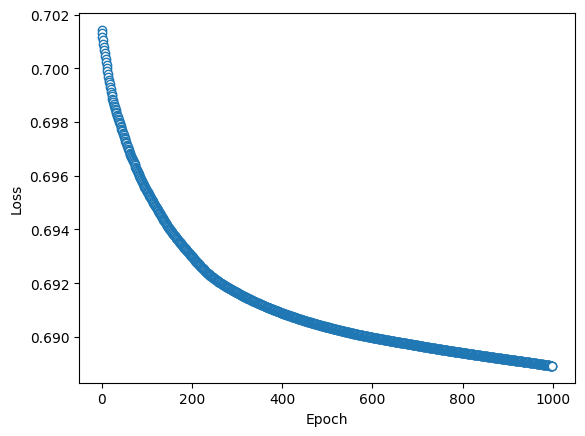

In [194]:
model,lossfn,optimizer = buildModel(0.01)
losses,predictions,totalacc = trainModel(model,lossfn,optimizer)
print(f'Final accuracy: {totalacc:.2f}%')

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

## Experiment

In [195]:
# tne set of learning rates to try
lrates = np.linspace(.001,.1,40)

# init output
accByLR = []
allLosses = np.zeros((len(lrates),Nepochs)) 

for i,lr in enumerate(lrates):
    ANNclassify,lossfn,optimizer = buildModel(lr)
    losses,predictions,totalacc = trainModel(ANNclassify,lossfn,optimizer)

    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

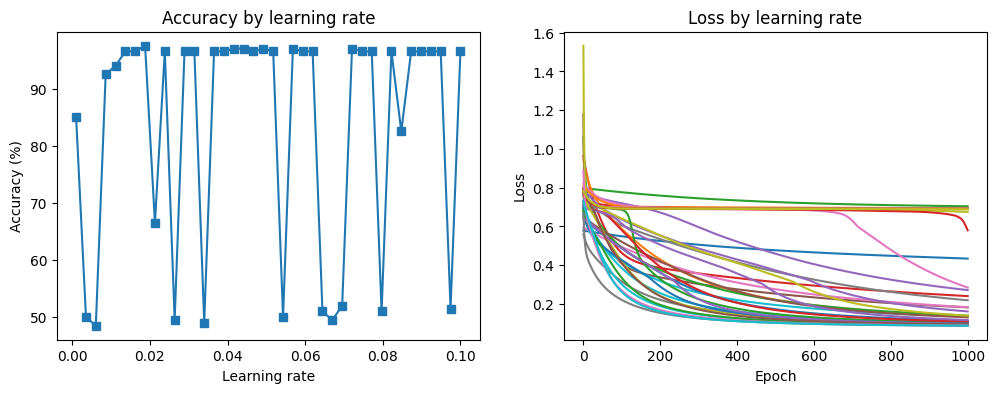

In [196]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(lrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss by learning rate')

plt.show()

In [197]:
# proportion of runs where accuracy > 70%
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7250)

## Meta Experiment

In [ ]:
numIters = 50
accMeta = np.zeros((numIters,len(lrates)))

Nepochs = 1000
for expi in range(numIters):
    for i,lr in enumerate(lrates):
        ANNclassify,lossfn,optimizer = buildModel(lr)
        losses,predictions,totalacc = trainModel(ANNclassify,lossfn,optimizer)
        accMeta[expi,i] = totalacc

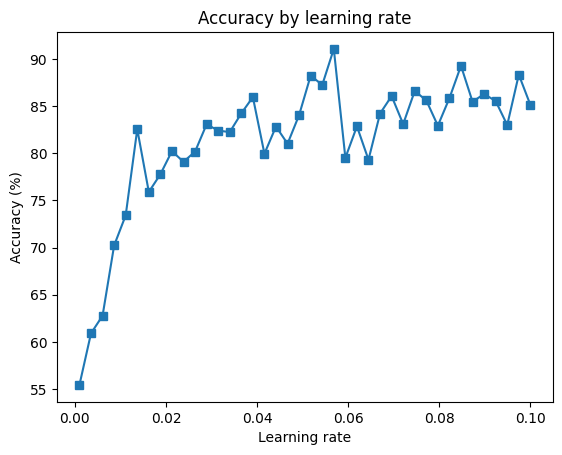

In [199]:
plt.plot(lrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy by learning rate')
plt.show()